# Code Review Analyser

## Importing the libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')

## Converting the downloaded file into a correct format

In [54]:
#The file containing review comments will be in excel format (.xlsx). We have to convert the excel file to a CSV file.
import pandas as pd 

df = pd.DataFrame(pd.read_excel("C:\datasets\CRR_Report_excel.xlsx")) 
  
df.to_csv("C:\datasets\CRR_Report_excel.csv")

In [55]:
#Further convert the CSV file to a TSV(Tab-separated values) file for better results.
import pandas as pd  
tsv_filepath = 'C:\\datasets\\comments.tsv'
csv_read = pd.read_csv("C:\datasets\CRR_Report_excel.csv")
with open(tsv_filepath,'w',encoding='utf-8') as write_tsv:
    write_tsv.write(csv_read.to_csv(sep='\t', index=False))

## Importing the dataset

In [56]:
df = pd.read_csv("C:\datasets\comment.tsv",delimiter = '\t', quoting = 3) #Importing the dataset

In [57]:
df.info() #concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 9 columns):
ID                     726 non-null object
Title                  153 non-null object
Status                 152 non-null object
Requestor              152 non-null object
Associated WorkItem    0 non-null float64
CommitId               152 non-null object
Reviewers              870 non-null object
ReviewDate             1711 non-null object
Comments               1699 non-null object
dtypes: float64(1), object(8)
memory usage: 161.7+ KB


## Removing duplicates

In [58]:
df["Comments"].describe() #checking for duplicates

count                       1699
unique                       991
top       No Additional Comments
freq                         671
Name: Comments, dtype: object

In [59]:
df.drop_duplicates(subset ="Comments", 
                     keep = False, inplace = True) #removing duplicates

In [60]:
df["Comments"].describe() #No more duplicates

count                                                   964
unique                                                  964
top       Please convert these comments as a standard do...
freq                                                      1
Name: Comments, dtype: object

## Cleaning the Comments column

In [61]:
from nltk.corpus import stopwords
import string
stop = stopwords.words('english')
df["Comments"] = df["Comments"].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation])) #removing punctuation
df["Comments"] = df["Comments"] .str.lower() #converting evertyhing to lower
df["Comments"] = df["Comments"].str.replace('\d+', '') #removing numbers

In [62]:
#removing stopwords
df["Comments_without_stopwords"] = df["Comments"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 

In [63]:
df["Comments_without_stopwords"].head(40) #corpus without any stopwords

3                          remove extra slash added end
5     combine activitypagequeryparams setuppagequery...
6     similar previous comment activitypagequerypara...
8                                  named import missing
9     still see gridcolumnsortproperties missing nam...
10                            combine import statements
11                combine ipcore import statements line
12                            combine import statements
13                         made single import statement
14                                       okay keep asis
15                                       index required
17       still see index appended end import statements
21                     import queue ipcore please check
22    export statement utility queue already part co...
26      okay please mention outcome rather saying fixed
30           think type make enum u limited strings use
31                  check circulardependency count also
33                                              

In [64]:
df['Comments_without_stopwords'].iloc[0] #checking a row without any stopwords

'remove extra slash added end'

In [65]:
df.head()

,ID,Title,Status,Requestor,Associated WorkItem,CommitId,Reviewers,ReviewDate,Comments,Comments_without_stopwords
3,NaN,NaN,NaN,NaN,NaN,NaN,"Dayapule, Chetan",6/1/2020 8:06,remove extra slash being added at the end,remove extra slash added end
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/1/2020 11:44,combine both activitypagequeryparams and setup...,combine activitypagequeryparams setuppagequery...
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/1/2020 11:49,similar to previous comment activitypagequeryp...,similar previous comment activitypagequerypara...
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/1/2020 12:50,named import is missing,named import missing
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/5/2020 17:41,i can still see that gridcolumnsortproperties...,still see gridcolumnsortproperties missing nam...


## Getting the most occuring trigrams

In [66]:
# Getting trigrams 
arr = df['Comments_without_stopwords'].tolist()
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(arr)  
features = (vectorizer.get_feature_names()) 
# print("\n\nFeatures : \n", features)
# print("\n\nX1 : \n", X1.toarray()) 

In [67]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(arr) 
scores = (X2.toarray()) 
# print("\n\nScores : \n", scores) 

In [68]:
# Getting most occuring trigrams from the set of all trigrams.
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['Comment1','rank']) 
words1 = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words1.head(50)) 



Words head : 
                                     Comment1      rank
2596                        move core module  2.980688
3534                     return type missing  2.707107
3166                            prime ng css  2.287486
274                     attach code coverage  2.179640
9                    access modifier missing  2.000000
727                combine import statements  2.000000
2164                 keep alphabetical order  2.000000
3100             please update documentation  2.000000
1282                          dont use prime  1.999825
4440                            use prime ng  1.999825
72                             add test case  1.688068
2589                    move angular imports  1.686268
3045                please add documentation  1.686268
3555                       review done great  1.646402
228               arrange alphabetical order  1.583346
3409                        rename file well  1.554990
4375                       use absolute path  1.

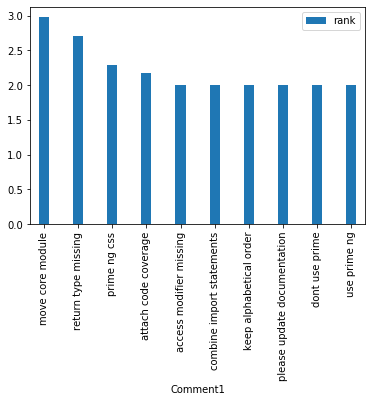

In [69]:
#plotting the top ten trigrams
trigrams =  words1.head(10)
top_ten = trigrams.plot.bar(x='Comment1', y='rank', rot=90, width=0.3)

## Getting the most occuring fourgrams

In [70]:
# Getting all fourgrams
arr = df['Comments_without_stopwords'].tolist()
vectorizer = CountVectorizer(ngram_range = (4,4)) 
X1 = vectorizer.fit_transform(arr)  
features = (vectorizer.get_feature_names()) 
# print("\n\nFeatures : \n", features)
# print("\n\nX1 : \n", X1.toarray()) 

In [71]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (4,4)) 
X2 = vectorizer.fit_transform(arr) 
scores = (X2.toarray()) 
# print("\n\nScores : \n", scores) 

In [72]:
# Getting top ranking fourgrams from set of all fourgrams
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['Comment2','rank']) 
words2 = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words2.head(50)) 



Words head : 
                                                Comment2      rank
1088                                  dont use prime ng  2.300311
2589                     please provide access modifier  2.000000
3724                                   use prime ng css  1.916418
2972                             review done great work  1.478370
458                           change year existing file  1.414214
1075                          dont change year existing  1.414214
2200                     move separate private function  1.388763
243                         attach code coverage report  1.375907
645                          comment use private method  1.335897
747         constant messages locatableconstantsts file  1.272946
2177        move constant messages locatableconstantsts  1.272946
558                          code duplication test case  1.000000
563                              code fix build failure  1.000000
581                     code please confirm screenshots  1.

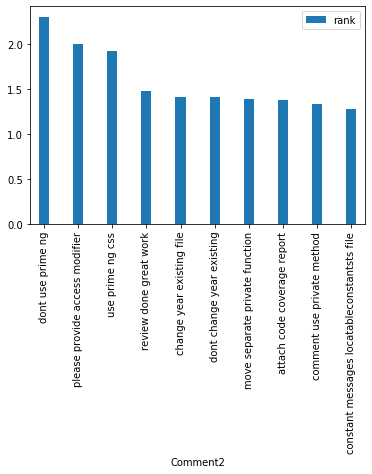

In [73]:
#plotting the top ten fourgrams
quadgrams =  words2.head(10)
top_ten = quadgrams.plot.bar(x='Comment2', y='rank', rot=90, width=0.3)

## Writting the results into a CSV file

In [75]:
#writting the most occuring trigrams into a CSV file
words1.to_csv("C:\datasets\top_trigrams.csv",encoding='utf-8')

In [76]:
#writting the most occuring quadgrams into a CSV file
words2.to_csv("C:\datasets\top_fourgrams.csv",encoding='utf-8')